In [59]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [60]:
from pandas import read_csv
filename = 'project1data.csv'
tables = read_csv(filename, header=0, index_col=0, decimal='M')

,UN,life_expectancy1,_expectancyx1000
1950,2525149000,46,45780
1951,2572850917,46,46108
1952,2619292068,47,46734
1953,2665865392,47,47304
1954,2713172027,48,47816
1955,2761650981,48,48273
1956,2811572031,49,48680
1957,2863042795,49,49047
1958,2916030167,49,49387
1959,2970395814,50,49730


In [61]:
def plot_results( un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [64]:
life_expectancy = tables._expectancyx1000/1000

1950    45.780
1951    46.108
1952    46.734
1953    47.304
1954    47.816
1955    48.273
1956    48.680
1957    49.047
1958    49.387
1959    49.730
1960    50.107
1961    50.547
1962    51.080
1963    51.717
1964    52.453
1965    53.261
1966    54.100
1967    54.919
1968    55.680
1969    56.364
1970    56.964
1971    57.490
1972    57.969
1973    58.425
1974    58.865
1975    59.294
1976    59.712
1977    60.115
1978    60.501
1979    60.871
         ...  
1986    63.239
1987    63.513
1988    63.758
1989    63.976
1990    64.171
1991    64.349
1992    64.520
1993    64.695
1994    64.881
1995    65.083
1996    65.305
1997    65.545
1998    65.803
1999    66.079
2000    66.376
2001    66.694
2002    67.030
2003    67.382
2004    67.746
2005    68.119
2006    68.497
2007    68.879
2008    69.258
2009    69.628
2010    69.984
2011    70.319
2012    70.631
2013    70.920
2014    71.185
2015    71.429
Name: _expectancyx1000, Length: 66, dtype: float64

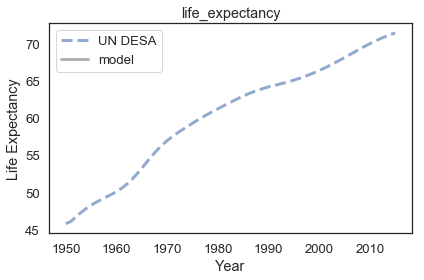

In [67]:
def plot_results( life_expectancy, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(life_expectancy, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
life_expectancy= tables._expectancyx1000/1000
empty = TimeSeries()
plot_results(life_expectancy, empty, 'life expectancy')
    
decorate(xlabel='Year', 
             ylabel='Life Expectancy',
             title='life_expectancy')

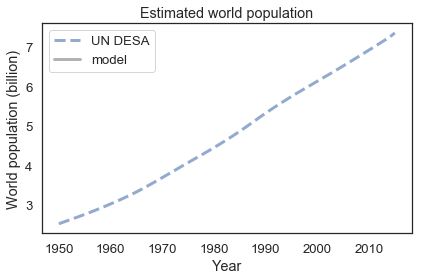

In [68]:
un = tables.UN / 1e9
empty = TimeSeries()
plot_results(un, empty, 'UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')


In [69]:
young = get_first_value(un) * 0.438
old= get_first_value(un) * 0.208
middle = get_first_value(un)-(young+old)
init = State(young=young, middle=middle, old=old)

,values
young,1.106015
middle,0.893903
old,0.525231


In [70]:
death_rate = 1/(tables.life_expectancy-44)


AttributeError: 'DataFrame' object has no attribute 'life_expectancy'

In [71]:
system = System(birth_rate=.08,
                mature_rate = 1/19,
                elder_rate = 1/26,
                t_0 = 1950,
                t_end = 2016,
                init=init)

,values
birth_rate,0.08
mature_rate,0.0526316
elder_rate,0.0384615
t_0,1950
t_end,2016
init,young 1.106015 middle 0.893903 old ...


In [72]:
def update_func1(state, t, system):
    births = system.birth_rate * state.middle
    maturings = system.mature_rate * state.young
    agings = system.elder_rate * state.middle
    death_rate2 = death_rate[t]
    deaths = death_rate2 * state.old
    young = state.young + births - maturings
    middle = state.middle + maturings - agings
    old = state.old + agings - deaths
    
    return State(young=young, middle=middle, old=old)
    

In [73]:
state = update_func1(init, system.t_0, system)
print(state)

young     1.119316
middle    0.917733
old       0.296996
dtype: float64


In [74]:
state = update_func1(state, system.t_0, system)

,values
young,1.133823
middle,0.941347
old,0.183796


In [75]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    
    state = system.init
    results[system.t_0] = state.young + state.middle + state.old
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results[t+1] = state.young + state.middle + state.old
        
    return results

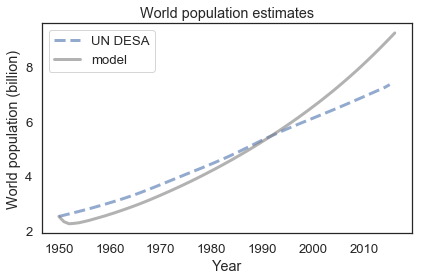

In [76]:
results = run_simulation(system, update_func1);
plot_results(un, results, 'World population estimates')

Question:
How does increased life expectancy impact population and age demographics?

State:

Imported data: life expectancy, population

Initial Values: # of young, middle, and old people, birth rate

Parameters:

Model life expectancy- increases aged pop

death rates based on aged pop, dead subtracted from aged pop, births based on middle pop and add to young pop

young: 0-19(?)
middle: 20-44(?)
old: 45-life expectancy

#### Update:
    
    
each year, 1/19 of young become middle, 1/26 middle become old, 1/(life expectancy-44) die

(this isn't quite right, but should be close enough?)

(Do we take into account the people who die young?) no

(Birth rate constant?) within middle pop, yes?
add to young population birth rate times middle pop
change middle pop hald wayt hrough- old means something different now

Run:


Visualize:

Main graph, time versus population divided into different age groups

life expectancy versus population